# Description

In [1]:
#1 get GC content from contigs
    #get GC content in set chunk sizes
    
#2 get coverage for contigs
    #get coverage in chunk sizes

#3 blob plot gc vs average coverage

#4 plot gc content/coverage for each contig (if significant in some way)

#5 kmeans clusters

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import os
import shutil

# Parameters

In [3]:
assembly = "./data/final.p_ctg_test.fasta"
coverage_per_contig = "./data/heliopora_coerulea_hifi_2_p_assembly.coverage"
coverage_per_base = "./data/heliopora_coerulea_hifi_2_p_assembly_test.depth"
chunk_size = 10000
visualizeGC = True
save_GC_plot = True

# Naive GC content for each content

In [4]:
def get_gc_content(fasta_file):
    """
    Reads in a FASTA file and returns a dictionary mapping contig IDs to their GC content
    """
    gc_content = {}
    current_id = None
    current_seq = ""
    
    with open(fasta_file, "r") as f:
        for line in f:
            if line.startswith(">"):
                # If this is a new contig, calculate the GC content for the previous one (if there was one)
                if current_id is not None:
                    gc_content[current_id] = (current_seq.count("G") + current_seq.count("C")) / len(current_seq)
                
                # Start the new contig
                current_id = line.strip()[1:]
                current_seq = ""
            else:
                current_seq += line.strip()
    
    # Calculate GC content for the final contig
    gc_content[current_id] = (current_seq.count("G") + current_seq.count("C")) / len(current_seq)
    
    return gc_content

In [5]:
naive_gc = get_gc_content(assembly)
print(naive_gc)

{'ctg/p/l/000409/0': 0.4361125376490347, 'ctg/p/l/000412/0': 0.3682002202177709}


# GC content for each contig by averaging in given chunk sizes

In [6]:
def get_gc_content_chunks(fasta_file, chunk_size):
    """
    Reads in a FASTA file and returns a dictionary mapping contig IDs to a list of gc content per chunk size
    """
    gc_content = {}
    current_id = None
    current_seq = ""
    chunks = []
    
    with open(fasta_file, "r") as f:
        for line in f:
            if line.startswith(">"):
                # If this is a new contig, calculate the GC content for the previous one (if there was one)
                if current_id is not None:
                    i = 0
                    while i < len(current_seq):
                        # check for last chunk
                        if (i + chunk_size) > len(current_seq):
                            end = len(current_seq)
                        else:
                            end = i + chunk_size
                        sub = current_seq[i:end]
                        gc = round(((sub.count("G") + sub.count("C")) / len(sub)),2)
                        chunks.append(gc)
                        i = end
                    # add to dictionary in form {current_id : [array of GC content of given chunk size]}
                    gc_content[current_id] = chunks
                
                # Start the new contig
                current_id = line.strip()[1:]
                current_seq = ""
                chunks = []
                
            else:
                current_seq += line.strip()
                
        # calculate GC content for the last contig
        if current_id is not None:
            i = 0
            while i < len(current_seq):
                # check for last chunk
                if (i + chunk_size) > len(current_seq):
                    end = len(current_seq)
                else:
                    end = i + chunk_size
                sub = current_seq[i:end]
                gc = round(((sub.count("G") + sub.count("C")) / len(sub)), 2)
                chunks.append(gc)
                i = end
            # add to dictionary in form {current_id : [array of GC content of given chunk size]}
            gc_content[current_id] = chunks
        
    return gc_content


In [7]:
chunks = get_gc_content_chunks(assembly, chunk_size)
#print(chunks)

# Visualize GC content 

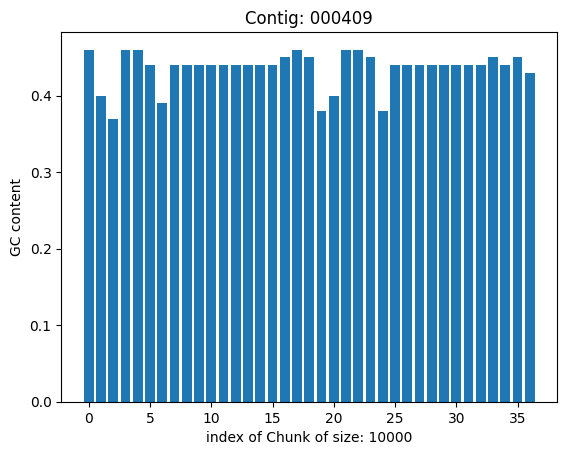

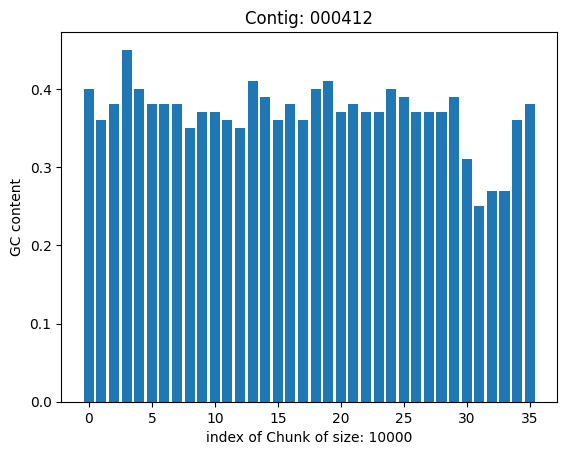

In [16]:
if save_GC_plot:
    save_dir = "./GC_visual_output"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

if visualizeGC:
    for id, gc_content in chunks.items():
        #format id
        id = id.split("/")[3]
        
        # create a bar plot
        plt.bar(range(len(gc_content)), gc_content)
        plt.title("Contig: " + str(id))
        plt.xlabel('index of Chunk of size: ' + str(chunk_size))
        plt.ylabel('GC content')

        # save the plot
        if save_GC_plot:
            save_path = os.path.join(save_dir, "GC_content_" + str(id) + ".png")
            plt.savefig(save_path)

        # show the plot
        plt.show()

else :
    print("GC visualization is turned off.")


# Naive coverage

In [23]:
def get_coverage_per_contig(coverage_file):
    naive_coverage = {}

    with open(coverage_file, "r") as f:
        next(f)
        for line in f:
            # Split line into columns
            columns = line.strip().split("\t")

            # Use the first column as key and the sixth column as value
            key = columns[0].split("/")[3]
            value = columns[5]

            # Add key-value pair to dictionary
            naive_coverage[key] = value
            
    f.close()
    return naive_coverage

In [24]:
naive_coverage = get_coverage_per_contig(coverage_per_contig)
print(naive_coverage)

{'000409': '100', '000412': '99.67', '000414': '99.6519', '000417': '100', '000419': '100', '000424': '99.8836', '000425': '99.9959', '000427': '99.8758', '000428': '99.9017', '000429': '99.6455', '000430': '99.9988', '000431': '99.9894', '000434': '99.988', '000435': '97.3743', '000438': '99.7891', '000439': '100', '000440': '99.2825', '000443': '99.9899', '000444': '100', '000445': '100', '000450': '100', '000451': '99.9928', '000453': '100', '000455': '100', '000456': '99.9544', '000461': '100', '000462': '99.8359', '000463': '99.9596', '000464': '100', '000465': '99.9197', '000466': '99.9997', '000468': '99.9623', '000469': '99.9352', '000472': '99.8703', '000476': '100', '000478': '99.7265', '000480': '99.9997', '000481': '99.9997', '000482': '99.6773', '000484': '99.999', '000485': '99.9579', '000486': '100', '000487': '100', '000489': '100', '000492': '100', '000493': '99.9993', '000494': '99.5339', '000496': '99.9972', '000497': '99.9179', '000498': '99.9336', '000501': '99.999